In [32]:
from sklearn.datasets import load_boston


In [33]:
boston = load_boston()

In [34]:
X = boston.data
y = boston.target

In [35]:
X.shape,y.shape

((506, 13), (506,))

In [36]:
import numpy as np

In [37]:
# Normalise the data
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X-u)/std

In [38]:
## add the row of ones for the x0 feature
ones = np.ones((X.shape[0],1))
print(ones.shape)

(506, 1)


In [39]:
X = np.hstack((ones,X))

In [40]:
## X -> matrix
## x -> a single vector

def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    
    for i in range(n):
        y_ += (theta[i]*x[i])
        
    return y_


def gradient(X,y,theta):
    m,n = X.shape
    grad = np.zeros((n,))
    
    for j in range(n):
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]
    
    return grad/m
        

def get_error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e += ((y_ - y[i])**2)
        
    return e/m


def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        grad = gradient(X,y,theta)
        for j in range(n):
            theta[j] = theta[j] - (learning_rate*grad[j])
        error = get_error(X,y,theta)
        error_list.append(error)
    
    return theta,error_list

In [41]:
import time

In [42]:
start_time = time.time()
theta,error_list = gradient_descent(X,y)
end_time = time.time()

In [43]:
theta

array([ 2.25328063e+01, -9.03091692e-01,  1.03815625e+00,  1.53477685e-02,
        6.99554920e-01, -2.02101672e+00,  2.70014278e+00, -1.93085233e-03,
       -3.10234837e+00,  2.34354753e+00, -1.72031485e+00, -2.04614394e+00,
        8.47845679e-01, -3.73089521e+00])

In [44]:
print(end_time-start_time)

22.327587842941284


## Calculate R2 score on Train data

In [45]:
y_ = []
for i in range(X.shape[0]):
    y_.append(hypothesis(X[i],theta))
y_ = np.array(y_)

In [46]:
def get_score(y_,y):
    num = np.sum((y-y_)**2)
    den = np.sum((y-np.mean(y))**2)
    return (1-(num/den))*100

In [47]:
get_score(y_,y)

74.04541323942743

### Time taken for execution using for loops

In [48]:
print(end_time-start_time)

22.327587842941284


### 22 seconds for just 506 training data points this is quite slow :(
**will be optimised using vectorisation**

In [49]:
import matplotlib.pyplot as plt

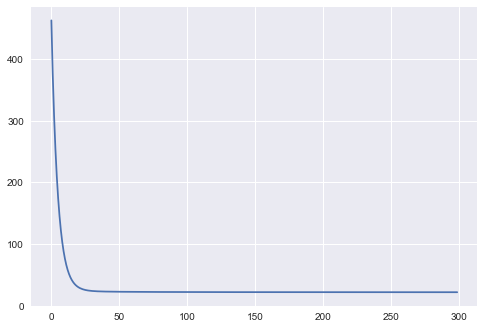

In [51]:
plt.style.use('seaborn')
plt.plot(error_list)
plt.show()

# Optimising Code using Vectorization
**An effecient Implementation for Linear Regression using Vectorisation**
- Avoid loops in the implementation, except gradient descent main loop
- Use numpy functions like `np.sum()`, `np.dot()` which are quite fast and already optimised

In [52]:
def hypothesis(X,theta):
    return np.dot(X,theta)


def gradient(X,y,theta):
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    return grad/m


def get_error(X,y,theta):
    y_ = hypothesis(X,theta)
    return np.sum((y_ - y)**2)/X.shape[0]


def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
    theta = np.zeros(X.shape[1])
    error_list = []

    for i in range(max_epochs):
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
        error = get_error(X,y,theta)
        error_list.append(error)
    
    return theta,error_list

In [54]:
start_time = time.time()
theta,error_list = gradient_descent(X,y)
end_time = time.time()
print(f"Time taken to execute {end_time-start_time}")

Time taken to execute 0.027307748794555664


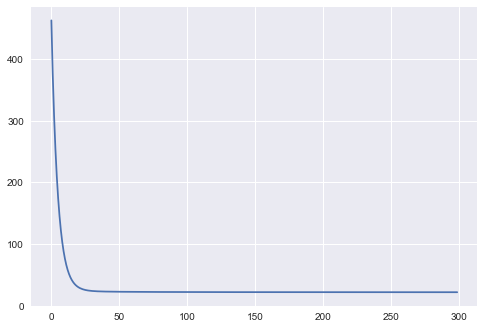

In [56]:
plt.plot(error_list)
plt.show()

In [57]:
theta

array([ 2.25328063e+01, -9.03091692e-01,  1.03815625e+00,  1.53477685e-02,
        6.99554920e-01, -2.02101672e+00,  2.70014278e+00, -1.93085233e-03,
       -3.10234837e+00,  2.34354753e+00, -1.72031485e+00, -2.04614394e+00,
        8.47845679e-01, -3.73089521e+00])

In [58]:
y_ = hypothesis(X,theta)
print(get_score(y_,y))

74.04541323942743


**we can easily see that execution time is way to less here and results are same hence code produce same results quite fast**